In [1]:
import pandas as pd

df = pd.read_csv("SupplyChainEmissionFactorsforUSIndustriesCommodities.csv")
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.424,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Optional: Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('mako')


In [3]:
df = pd.read_csv("SupplyChainEmissionFactorsforUSIndustriesCommodities.csv")
df.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.424,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [4]:
# Drop unwanted column
df = df.drop(columns=["Unnamed: 7"], errors='ignore')

# Drop missing values
df = df.dropna()

# Define features and target
X = df.select_dtypes(include=[np.number]).drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R² Score"])
results_df



,Model,RMSE,MAE,R² Score
0,Linear Regression,0.000031,0.000021,1.00000
1,Decision Tree,0.019595,0.005123,0.98241
2,Random Forest,0.020937,0.004655,0.97992


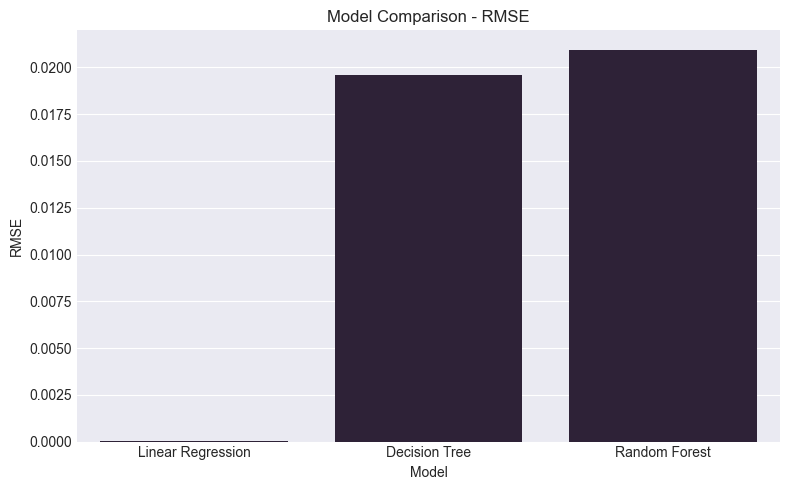

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title("Model Comparison - RMSE")
plt.tight_layout()
plt.show()


In [8]:
# Lighter param grid for faster execution
param_grid = {
    'n_estimators': [50],    # only one value
    'max_depth': [None, 5]   # two values
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)  # Reduce CV folds
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("✅ Best Parameters:", grid.best_params_)


✅ Best Parameters: {'max_depth': None, 'n_estimators': 50}


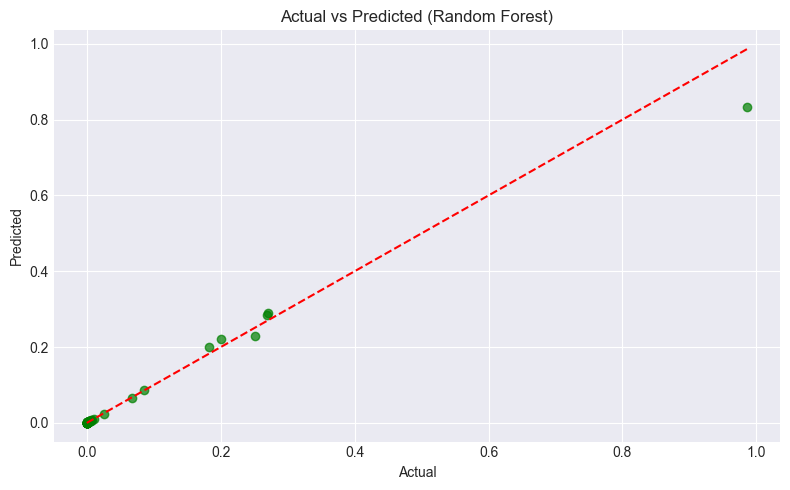

In [9]:
best_pred = best_rf.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, best_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Random Forest)")
plt.tight_layout()
plt.show()


In [10]:
best_pred = best_rf.predict(X_test)


In [11]:
# Use default Random Forest
best_rf = RandomForestRegressor(random_state=42)
best_rf.fit(X_train, y_train)

# Predict and proceed
best_pred = best_rf.predict(X_test)


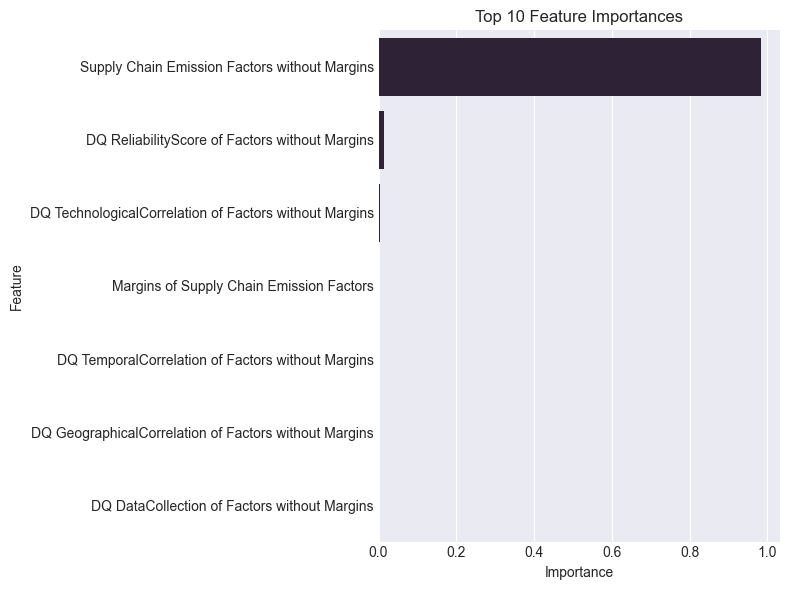

In [12]:
importances = best_rf.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [13]:
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("Model saved successfully.")


Model saved successfully.


### ✅ Week 2 Summary

- Cleaned and prepared the dataset
- Trained 3 models: Linear Regression, Decision Tree, Random Forest
- Evaluated models using RMSE, MAE, and R² Score
- Tuned Random Forest using GridSearchCV
- Visualized performance with RMSE chart, residual plot, and feature importance
- Saved the best performing model (`best_random_forest_model.pkl`)
